# Newton's method for root finding 

Given a a differentiable function $f: \mathbb{R} \to \mathbb{R}$, Newton's method is an iterative method for approximating a root $x_*$ of $f$ via the sequence $\{x_k\}_{k = 0}^\infty \subset \mathbb{R}$, where $x_0$ is an initial point chosen as an initial guess for $x_*$ and $$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)} \; \text{for} \; k \ge 0.$$

Note that this sequence is only well-defined if $f'(x_k) \neq 0$ for all $k \ge 0$.

The [SciPy package](https://docs.scipy.org/doc/scipy/index.html) has an implementation of Newton's method (documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)).

See the Wikipedia entry on Newton's method [here](https://en.wikipedia.org/wiki/Newton%27s_method) and its uses in optimization [here](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) for a more thorough discussion. 

### Sample implementation of Newton's method

In [295]:
## Importing packages
import os 
import numpy as np
import sympy as sp 
import matplotlib.pyplot as plt
from sympy import *
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.lines import Line2D

In [296]:
def newton(f, x0, max_iterations=20, accuracy=1.0e-06, df=None):
    """
    Performs Newton's method to find the root of a function.
    ----------
    Parameters:
    f (function): The function for which to find the root.
    x0 (float): Initial guess for the root.
    max_iterations (int): Maximum number of iterations.
    accuracy (float): Desired accuracy.
    df (function, optional): Derivative of the function. If None, it will be computed symbolically.
    ----------
    Returns:
    str: Final approximation of the root or an error message.
    """
    
    x = x0
    if np.abs(f(x0)) < accuracy:
        return(f"f(x_0) is already accurate: f(x_0 = {x0}) = {f(x0)}")
    
    print(f"Initial guess: x_0 = {x}")
    expr = 'newtons_method'
    
    #symbolic differentiation
    if df is None:
        y = symbols('x')
        expr = f(y)
        df = Lambda(y, diff(expr, y))    
        print(f"Function: {expr}, Derivative: {df(y)}")
        
    for i in range(max_iterations):
        fx = f(x)
        if i == 0 and np.abs(fx) < accuracy:
            print(f"Initial approximation is already accurate.")
            return(f"Final apprxoiatmion: x_0 = {x}")
            
        dfx = df(x)
        
        #funnction terminates if f'(x_i) = 0
        if(np.abs(dfx) < 1.0e-16):
            return(f"Derivative is zero: f'(x_{i}) = 0. Method failed to converge.")

        dx = fx / dfx

        x = float(x - dx)
        print(f"Iteration {i+1}: x_{i+1} = {x}")
        #function terminates if either |f(x_i) - 0| is less than the specified accuracy or if |x_{i} - x_{i-1}| is less than the specified accuracy
        if(np.abs(fx) < accuracy or np.abs(dx) < accuracy):
            print(f"Number of iterations = {i+1}")
            return(f"Final approximation: x_{i+1} = {x}")

    return(f"Exceeded maximum iterations (max_iter = {max_iterations}), method failed to converge")

##### Examples

In [297]:
def f(x):
    return x**2 - x - 1

newton(f,1.0)

Initial guess: x_0 = 1.0
Function: x**2 - x - 1, Derivative: 2*x - 1
Iteration 1: x_1 = 2.0
Iteration 2: x_2 = 1.6666666666666667
Iteration 3: x_3 = 1.619047619047619
Iteration 4: x_4 = 1.618034447821682
Iteration 5: x_5 = 1.618033988749989
Number of iterations = 5


'Final approximation: x_5 = 1.618033988749989'

In [298]:
newton(f,1.0, max_iterations = 2)

Initial guess: x_0 = 1.0
Function: x**2 - x - 1, Derivative: 2*x - 1
Iteration 1: x_1 = 2.0
Iteration 2: x_2 = 1.6666666666666667


'Exceeded maximum iterations (max_iter = 2), method failed to converge'

In [299]:
newton(f,1.0, accuracy = 1.0e-16)

Initial guess: x_0 = 1.0
Function: x**2 - x - 1, Derivative: 2*x - 1
Iteration 1: x_1 = 2.0
Iteration 2: x_2 = 1.6666666666666667
Iteration 3: x_3 = 1.619047619047619
Iteration 4: x_4 = 1.618034447821682
Iteration 5: x_5 = 1.618033988749989
Iteration 6: x_6 = 1.618033988749895
Iteration 7: x_7 = 1.618033988749895
Number of iterations = 7


'Final approximation: x_7 = 1.618033988749895'

In [300]:
p = lambda x: x**2 - 1 

newton(p,0)

Initial guess: x_0 = 0
Function: x**2 - 1, Derivative: 2*x


"Derivative is zero: f'(x_0) = 0. Method failed to converge."

In [301]:
p = lambda x: sp.cos(x) - x

newton(p,1)

Initial guess: x_0 = 1
Function: -x + cos(x), Derivative: -sin(x) - 1
Iteration 1: x_1 = 0.7503638678402439
Iteration 2: x_2 = 0.7391128909113617
Iteration 3: x_3 = 0.739085133385284
Iteration 4: x_4 = 0.7390851332151607
Number of iterations = 4


'Final approximation: x_4 = 0.7390851332151607'

In [302]:
def f(x):
    if x >= 0:
        return x**(1/3)
    elif x < 0:
        return -(abs(x)**(1/3))
    
def df(x):
    if x >= 0:
        return (1/3)*x**(-2/3)
    elif x < 0:
        return (1/3)*abs(x)**(-2/3)
    
newton(f,0.1,df = df)

Initial guess: x_0 = 0.1
Iteration 1: x_1 = -0.20000000000000004
Iteration 2: x_2 = 0.4
Iteration 3: x_3 = -0.8000000000000002
Iteration 4: x_4 = 1.6
Iteration 5: x_5 = -3.2000000000000006
Iteration 6: x_6 = 6.4
Iteration 7: x_7 = -12.799999999999999
Iteration 8: x_8 = 25.599999999999994
Iteration 9: x_9 = -51.199999999999974
Iteration 10: x_10 = 102.3999999999999
Iteration 11: x_11 = -204.79999999999973
Iteration 12: x_12 = 409.5999999999992
Iteration 13: x_13 = -819.199999999998
Iteration 14: x_14 = 1638.3999999999955
Iteration 15: x_15 = -3276.7999999999897
Iteration 16: x_16 = 6553.599999999975
Iteration 17: x_17 = -13107.19999999994
Iteration 18: x_18 = 26214.39999999987
Iteration 19: x_19 = -52428.79999999969
Iteration 20: x_20 = 104857.59999999925


'Exceeded maximum iterations (max_iter = 20), method failed to converge'

### Sample implementation of generating animations of Newton's method

In [303]:
#helper function for making .gif 
def create_newton_gif(f, df, x0, x_range, result, x_values, legend_loc, filename=f'newtons_method.gif', fps = 1):
    """
    Helper function for creating an animated GIF visualizing Newton's method for approximating roots of a function.
    ----------
    Parameters:
    f (function): The function for which the root is being found.
    df (function): The derivative of the function f.
    x0 (float): The initial guess for the root.
    x_range (tuple): A tuple specifying the range of x values to be plotted (x_min, x_max).
    result (str): The final text to be displayed in the last frame of the animation.
    x_values (list): A list of x values representing the iterations of Newton's method.
    legend_loc (str): The location of the legend on the plot (e.g., 'upper right', 'lower left').
    filename (str, optional): The name of the output GIF file. Default is 'newtons_method.gif'.
    fps (int, optional): Frames per second for the GIF. Default is 1.
    ----------
    Returns:
    None
    This function generates an animated GIF that shows iterations of Newton's method. The animation is saved as a GIF file in the 'gif' directory.
    """

    x_vals = np.linspace(x_range[0], x_range[1], 400)
    y_vals = np.array([f(x) for x in x_vals])

    fig, ax = plt.subplots()
    ax.plot(x_vals, y_vals, label='f(x)')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5) 
    plt.xlim(x_range[0], x_range[1])
    
    point, = ax.plot([], [], 'ro')
    tangent_line, = ax.plot([], [], 'b--', linewidth=1)
    tangent_point, = ax.plot([], [], 'bo') 
    text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
   
    def update(frame):
        if frame < len(x_values):
            x = x_values[frame]
            y = f(x)
            point.set_data(x, y)

            #plot the tangent line at the current point
            dfx = df(x)
            tangent_x_vals = np.linspace(x_range[0], x_range[1], 100)
            tangent_y_vals = y + dfx * (tangent_x_vals - x)
            tangent_line.set_data(tangent_x_vals, tangent_y_vals)
            
            #calculate the intersection of the tangent line with the x-axis
            if np.abs(dfx) > 1.0e-16:
                tangent_x_intercept = x - y / dfx
                tangent_point.set_data(tangent_x_intercept, 0)
                text.set_text(f'Iteration {frame + 1}: x_{frame} = {x:.6f}, x_{frame + 1} = {float(tangent_x_intercept):.6f}')
            
            if frame == len(x_values) - 1:
                text.set_text(result)
                text.set_fontsize(9)
                
            legend_elements = [
                Line2D([0], [0], color='blue', marker='o', linestyle='None', label=f'Blue point: (x_{frame + 1}, 0)'),
                Line2D([0], [0], color='red', marker='o', linestyle='None', label=f'Red point: (x_{frame}, f(x_{frame}))'),
                Line2D([0], [0], label='f(x)'),
                Line2D([0], [0], color='blue', linestyle='--', label=f'Tangent line at (x_{frame}, f(x_{frame}))')
            ]
            ax.legend(handles=legend_elements, loc=legend_loc, fontsize='small')
            

            # #possible block of code to build upon to adjust plot window dynamically - not used in this version
            # if float(tangent_x_intercept) < x_range[0] or float(tangent_x_intercept) > x_range[1]:
            #     xlim_range = (10*x_range[0], 10*x_range[1])
            #     ax.set_xlim(xlim_range)

        return point, tangent_line, tangent_point, text

    ani = FuncAnimation(fig, update, frames=len(x_values), repeat=False)

    writer = PillowWriter(fps=fps)
    if not os.path.exists('gif'):
        os.makedirs('gif')
    ani.save(os.path.join('gif', filename), writer=writer)
    print(f".gif saved as {filename}")
    
    
def newton(f, x0, max_iterations=20, accuracy=1.0e-06, df = None, create_gif = False, x_range = (-5,5), legend_loc ='lower right', fps = 1):
    """
    Performs Newton's method to find the root of a function. Optionally, creates an animated GIF of the iterations.
    ----------
    Parameters:
    f (function): The function for which the root is to be found.
    x0 (float): Initial guess for the root.
    max_iterations (int, optional): Maximum number of iterations to perform. Default is 20.
    accuracy (float, optional): Desired accuracy for the root. Default is 1.0e-06.
    df (function, optional): Derivative of the function f. If None, the derivative will be computed symbolically. Default is None.
    ###########
    create_gif (bool, optional): If True, create a GIF of the iterations. Default is False.
    x_range (tuple, optional): Range of x values for plotting the function and iterations. Default is (-5, 5).
    legend_loc (str, optional): Location of the legend in the plot. Default is 'lower right'.
    fps (int, optional): Frames per second for the GIF. Default is 1.
    ----------
    Returns:
    str: A message indicating the result of the method, including the final approximation of the root or the reason for failure.
    """
    
    x = x0
    
    if np.abs(f(x0)) < accuracy:
        return(f"f(x_0) is already accurate: f(x_0 = {x0}) = {f(x0)}")
    
    expr = 'newtons_method'
    print(f"Initial guess: x_0 = {x}")
   
    #symbolic differentiation if df is not provided
    if df is None:
        y = symbols('x')
        expr = f(y)
        df = Lambda(y, diff(expr, y))    
        print(f"Function: {expr}, Derivative: {df(y)}")
    else:
        #use the provided derivative
        df = df
    
    x_values = []  #to store x-values for each iteration
    x_values.append(x) 
    for i in range(max_iterations):
        fx = f(x)
        dfx = df(x)
        
        #function terminates if f'(x_i) = 0
        if np.abs(dfx) < 1.0e-16:
            print(f"Derivative is zero: f'(x_{i}) = 0. Method failed to converge.")
            if create_gif:
                result = f"Derivative is zero: f'(x_{i}) = 0. Method failed to converge."
                create_newton_gif(f, df, x0, x_range, result, x_values, legend_loc, filename=f'{expr}, x0={x0}.gif', fps=fps)
                return
            else:
                return(f"Derivative is zero: f'(x_{i}) = 0. Method failed to converge.")
             
        dx = fx / dfx
        x = float(x - dx)
        x_values.append(x) 
        print(f"Iteration {i+1}: x_{i+1} = {x}")
        
        #function terminates if |f(x_i) - 0| is less than the specified accuracy or |x_{i} - x_{i-1}| is less than the specified accuracy
        if np.abs(fx) < accuracy or np.abs(dx) < accuracy:
            print(f"Number of iterations = {i+1}")
            if create_gif:
                result = f"Final approximation: x_{i+1} = {x}"
                create_newton_gif(f, df, x0, x_range, result, x_values, legend_loc, filename=f'{expr}, x0={x0}.gif', fps=fps)
                return
            else:
                return(f"Final approximation: x_{i+1} = {x}")
        
    if create_gif:
        result = f"Exceeded maximum iterations (max_iter = {max_iterations}), method failed to converge"
        create_newton_gif(f, df, x0, x_range, result, x_values, legend_loc, filename=f'{expr}, x0={x0}.gif', fps=fps)
    else:
        return(f"Exceeded maximum iterations (max_iter = {max_iterations}), method failed to converge")

### Examples

In [304]:
def f(x):
    if x >= 0:
        return x**(1/3)
    elif x < 0:
        return -(abs(x)**(1/3))
    
def df(x):
    if x >= 0:
        return (1/3)*x**(-2/3)
    elif x < 0:
        return (1/3)*abs(x)**(-2/3)
    
newton(f,0,df = df)

'f(x_0) is already accurate: f(x_0 = 0) = 0.0'

Initial guess: x_0 = 0.1
Iteration 1: x_1 = -0.20000000000000004
Iteration 2: x_2 = 0.4
Iteration 3: x_3 = -0.8000000000000002
Iteration 4: x_4 = 1.6
Iteration 5: x_5 = -3.2000000000000006
Iteration 6: x_6 = 6.4
Iteration 7: x_7 = -12.799999999999999
Iteration 8: x_8 = 25.599999999999994
Iteration 9: x_9 = -51.199999999999974
Iteration 10: x_10 = 102.3999999999999
Iteration 11: x_11 = -204.79999999999973
Iteration 12: x_12 = 409.5999999999992
Iteration 13: x_13 = -819.199999999998
Iteration 14: x_14 = 1638.3999999999955
Iteration 15: x_15 = -3276.7999999999897
Iteration 16: x_16 = 6553.599999999975
Iteration 17: x_17 = -13107.19999999994
Iteration 18: x_18 = 26214.39999999987
Iteration 19: x_19 = -52428.79999999969
Iteration 20: x_20 = 104857.59999999925


/var/folders/26/4pkbxtc53xn8f9brx540204c0000gn/T/ipykernel_66433/3152569096.py:22: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x, y)
/var/folders/26/4pkbxtc53xn8f9brx540204c0000gn/T/ipykernel_66433/3152569096.py:33: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  tangent_point.set_data(tangent_x_intercept, 0)


.gif saved as newtons_method, x0=0.1.gif


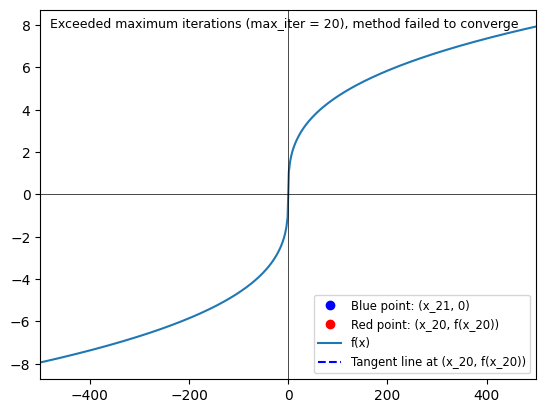

In [305]:
def f(x):
    if x >= 0:
        return x**(1/3)
    elif x < 0:
        return -(abs(x)**(1/3))
    
def df(x):
    if x >= 0:
        return (1/3)*x**(-2/3)
    elif x < 0:
        return (1/3)*abs(x)**(-2/3)
    
newton(f,0.1,df = df, create_gif=True, x_range = (-500,500))

<img src="./gif/newtons_method, x0=0.1.gif" width="600" align="center">

Initial guess: x_0 = 0
Function: x**3 - 2*x + 2, Derivative: 3*x**2 - 2
Iteration 1: x_1 = 1.0
Iteration 2: x_2 = 0.0
Iteration 3: x_3 = 1.0
Iteration 4: x_4 = 0.0
Iteration 5: x_5 = 1.0
Iteration 6: x_6 = 0.0
Iteration 7: x_7 = 1.0
Iteration 8: x_8 = 0.0
Iteration 9: x_9 = 1.0
Iteration 10: x_10 = 0.0
Iteration 11: x_11 = 1.0
Iteration 12: x_12 = 0.0
Iteration 13: x_13 = 1.0
Iteration 14: x_14 = 0.0
Iteration 15: x_15 = 1.0
Iteration 16: x_16 = 0.0
Iteration 17: x_17 = 1.0
Iteration 18: x_18 = 0.0
Iteration 19: x_19 = 1.0
Iteration 20: x_20 = 0.0


/var/folders/26/4pkbxtc53xn8f9brx540204c0000gn/T/ipykernel_66433/3152569096.py:22: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x, y)
/var/folders/26/4pkbxtc53xn8f9brx540204c0000gn/T/ipykernel_66433/3152569096.py:33: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  tangent_point.set_data(tangent_x_intercept, 0)


.gif saved as x**3 - 2*x + 2, x0=0.gif


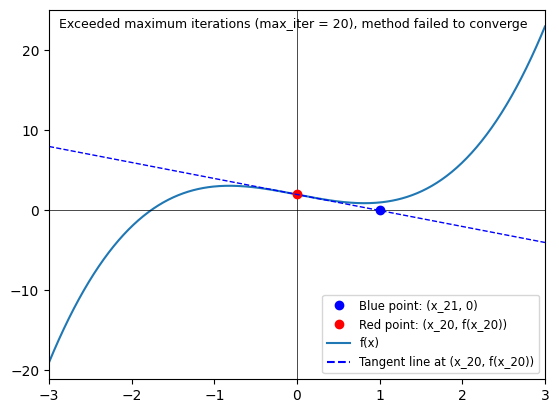

In [306]:
p = lambda x: x**3 - 2*x + 2
newton(p,0, create_gif=True, x_range = (-3,3), fps=4)

<img src="./gif/x**3 - 2*x + 2, x0=0.gif" width="600" align="center">

Initial guess: x_0 = 2
Function: x**3 - 2*x + 2, Derivative: 3*x**2 - 2
Iteration 1: x_1 = 1.4
Iteration 2: x_2 = 0.8989690721649484
Iteration 3: x_3 = -1.2887793276654596
Iteration 4: x_4 = -2.105767299013565
Iteration 5: x_5 = -1.8291999504602496
Iteration 6: x_6 = -1.771715812062107
Iteration 7: x_7 = -1.76929656115579
Iteration 8: x_8 = -1.769292354251341
Iteration 9: x_9 = -1.7692923542386314
Number of iterations = 9


/var/folders/26/4pkbxtc53xn8f9brx540204c0000gn/T/ipykernel_66433/3152569096.py:22: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x, y)
/var/folders/26/4pkbxtc53xn8f9brx540204c0000gn/T/ipykernel_66433/3152569096.py:33: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  tangent_point.set_data(tangent_x_intercept, 0)


.gif saved as x**3 - 2*x + 2, x0=2.gif


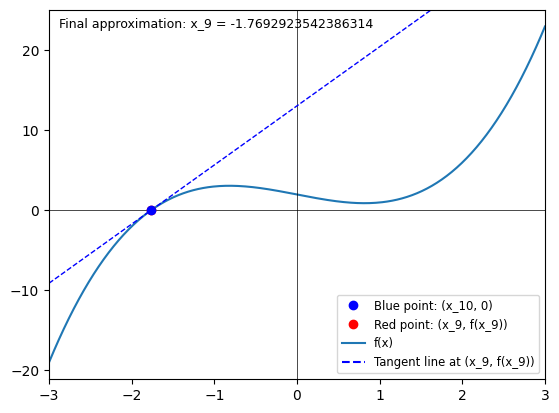

In [307]:
p = lambda x: x**3 - 2*x + 2
newton(p,2, create_gif=True, x_range = (-3,3))

Initial guess: x_0 = 0
Function: x**2 - 1, Derivative: 2*x
Derivative is zero: f'(x_0) = 0. Method failed to converge.
.gif saved as x**2 - 1, x0=0.gif


/var/folders/26/4pkbxtc53xn8f9brx540204c0000gn/T/ipykernel_66433/3152569096.py:22: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x, y)


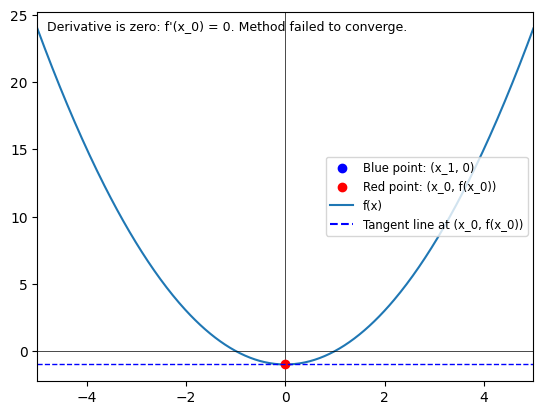

In [308]:
p = lambda x: x**2 - 1 

newton(p,0,create_gif=True, legend_loc='right', x_range = (-5,5))

Initial guess: x_0 = -1
Function: -x + cos(x), Derivative: -sin(x) - 1
Iteration 1: x_1 = 8.716216958779569
Iteration 2: x_2 = 2.976060655096912
Iteration 3: x_3 = -0.42578468868523034
Iteration 4: x_4 = 1.851183817731179
Iteration 5: x_5 = 0.7660395196449308
Iteration 6: x_6 = 0.739241067496082
Iteration 7: x_7 = 0.7390851385832758
Iteration 8: x_8 = 0.7390851332151607
Number of iterations = 8


/var/folders/26/4pkbxtc53xn8f9brx540204c0000gn/T/ipykernel_66433/3152569096.py:22: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x, y)
/var/folders/26/4pkbxtc53xn8f9brx540204c0000gn/T/ipykernel_66433/3152569096.py:33: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  tangent_point.set_data(tangent_x_intercept, 0)


.gif saved as -x + cos(x), x0=-1.gif


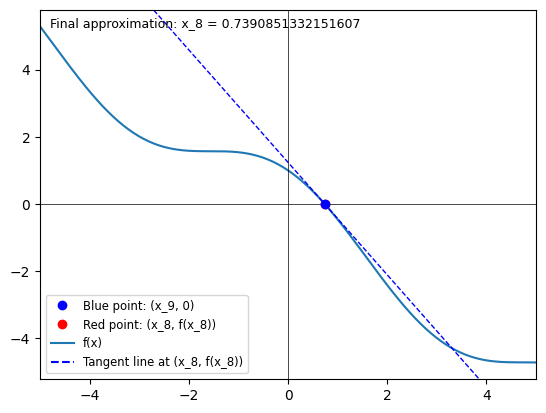

In [309]:
p = lambda x: sp.cos(x) - x

newton(p,-1,create_gif=True, legend_loc='lower left', x_range = (-5,5))

Initial guess: x_0 = -1.05
Function: -x + cos(x), Derivative: -sin(x) - 1
Iteration 1: x_1 = 10.623017802897209
Iteration 2: x_2 = -149.53717472609904
Iteration 3: x_3 = -72.76778728596186
Iteration 4: x_4 = -24.489327664165017
Iteration 5: x_5 = -8.682773137773653
Iteration 6: x_6 = 15.823243278584068
Iteration 7: x_7 = -3.1791047518384072
Iteration 8: x_8 = -1.0780914390387664
Iteration 9: x_9 = 11.962588114141768
Iteration 10: x_10 = -13.808744546580096
Iteration 11: x_11 = 250.58645553822976
Iteration 12: x_12 = -518.1646870967267
Iteration 13: x_13 = 125.74607536254052
Iteration 14: x_14 = 10.480234459223695
Iteration 15: x_15 = -74.00938966516341
Iteration 16: x_16 = -36.60545456052218
Iteration 17: x_17 = -16.97697900221833
Iteration 18: x_18 = -8.44429876117235
Iteration 19: x_19 = 38.16329996999587
Iteration 20: x_20 = 12.419573867990216
Iteration 21: x_21 = -0.9691208431821572
Iteration 22: x_22 = 7.772587716123008
Iteration 23: x_23 = 3.9205695411979633
Iteration 24: x_24 = 

/var/folders/26/4pkbxtc53xn8f9brx540204c0000gn/T/ipykernel_66433/3152569096.py:22: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x, y)
/var/folders/26/4pkbxtc53xn8f9brx540204c0000gn/T/ipykernel_66433/3152569096.py:33: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  tangent_point.set_data(tangent_x_intercept, 0)


.gif saved as -x + cos(x), x0=-1.05.gif


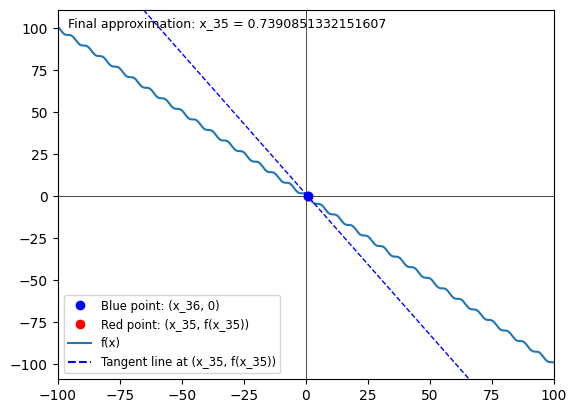

In [310]:
p = lambda x: sp.cos(x) - x

newton(p,-1.05,create_gif=True, legend_loc='lower left', x_range = (-100,100), max_iterations=100, fps=5)